In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

import textblob
from textblob_de import TextBlobDE
import seaborn as sns

In [2]:
df = pd.read_csv('kbClean.csv')

In [3]:
dfgm = pd.read_csv('GM_Clean.csv')

In [4]:
dfgm

,Name der Klinik,Bewertung,Sternebewertung,Zufriedenheit,Polarity Level,Polarity Stimmung
0,Herzogin Elisabeth Hospital,Vor der Corona Pandemie hätte ich jeden zugest...,2,Negativ,0.283333,Positiv
1,Herzogin Elisabeth Hospital,"Tolles Krankenhaus, trotzdem bin ich lieber g...",4,Positiv,0.500000,Positiv
2,Herzogin Elisabeth Hospital,"Lungenembolie! Ein Tag ITS, phantastische Fürs...",5,Positiv,0.333333,Positiv
3,Herzogin Elisabeth Hospital,Vor wenigen Tagen wurde bei mir ein Ganglion a...,5,Positiv,0.407292,Positiv
4,Herzogin Elisabeth Hospital,Alles sehr gut. Volle Punktzahl!,5,Positiv,0.500000,Positiv
...,...,...,...,...,...,...
1927,Diana Kliniken,Ich war bis 31.10. 18 für 6 Wochen in der Reha...,4,Positiv,-0.166667,Negativ
1928,Diana Kliniken,Sehr unfreundliche empfangsdame... Habe lieb ...,1,Negativ,0.000000,Negativ
1929,Diana Kliniken,"Eine grosse, aber sehr gute Klinik. Sehr freun...",5,Positiv,0.740000,Positiv
1930,Diana Kliniken,"Diana 2 ""Super"" auch weiter so!",5,Positiv,1.000000,Positiv


In [6]:
kb_stars = dfgm[['Name der Klinik', 'Sternebewertung']]

In [7]:
kb_means = kb_stars.groupby(['Name der Klinik'], as_index=False)['Sternebewertung'].mean()
kb_means = kb_means.sort_values(by='Sternebewertung', ascending=False)
kb_means

,Name der Klinik,Sternebewertung
5,Eilenriede Klinik Hannover,4.766667
9,Herzogin Elisabeth Hospital,4.238938
23,St. Martini Krankenhaus,4.218750
11,Klinik Fallingbostel,4.090909
19,Kreiskrankenhaus Osterholz,3.925000
12,Klinik am Zuckerberg,3.918919
4,Diana Kliniken,3.866667
22,Sophienklinik,3.820000
13,Klinikum Peine,3.500000
20,MediClin Klinikum Soltau,3.351852


In [70]:
df.head()

,NameKlinik,Erfahrungsbericht,Gesamt,QualBeratung,MedBehandlung,VerwalAblaeufe,Zufriedenheit,ist_zufrieden,Polarity Level,Polarity Stimmung
0,Herzogin Elisabeth Hospital,Sehr höfliche und hilfsbereite Mitarbeiter. S...,5.0,5.0,5.0,5.0,Positiv,1,0.462500,Positiv
1,Herzogin Elisabeth Hospital,Kann ich nur weiterempfehlen!! Sehr gutes Pfle...,5.0,3.7,5.0,3.7,Positiv,1,0.000000,Negativ
2,Herzogin Elisabeth Hospital,Bestens durchorganisiert.gutes Personal geht i...,5.0,5.0,5.0,5.0,Positiv,1,0.000000,Negativ
3,Herzogin Elisabeth Hospital,Bin nach einem Autounfall im HEH gewesen und h...,5.0,5.0,5.0,5.0,Positiv,1,0.340000,Positiv
4,Herzogin Elisabeth Hospital,Wurde bereits im Sept. 2020 am Knie operiert. ...,5.0,5.0,5.0,5.0,Positiv,1,0.242857,Positiv


In [66]:
kb_stars = df[['NameKlinik', 'Gesamt', 'Zufriedenheit']]
kb_means = kb_stars.groupby(['NameKlinik'], as_index=False)['Gesamt'].mean()
kb_means = kb_means.sort_values('Gesamt',ascending=False, ignore_index=True)
vergleich_list = kb_means['Gesamt'].to_list()

In [32]:
#vergleich_klinikname = kb_means['NameKlinik'].to_list()

In [6]:
#vergleich_list

In [7]:
#vergleich_klinikname

In [8]:
#dizi = df.groupby('NameKlinik')['Gesamt'].size()

In [9]:
#dizi

In [33]:
df2 = df.groupby(['NameKlinik', 'Gesamt']).size().unstack().reset_index()

In [34]:
df2

Gesamt,NameKlinik,1.0,2.3,3.7,5.0
0,AMEOS Klinikum Hildesheim,95,14,23,39
1,AMEOS Klinikum Seepark Geestland,31,7,19,87
2,Agaplesion - Diakonieklinikum Rotenburg,107,25,25,140
3,DIAKOVERE Henriettenstift,66,30,30,115
4,Diana Klinik-Fachklinik für Physikalische Medizin,55,32,81,158
5,Eilenriede Klinik Hannover,5,2,4,38
6,Elbe Klinikum Buxtehude,18,7,11,46
7,HELIOS Klinik Cuxhaven,48,6,7,64
8,Helios Kliniken Mittelweser - Krankenhaus Nien...,48,8,9,59
9,Herzogin Elisabeth Hospital,20,5,10,95


In [35]:
df2.set_index('NameKlinik').T.to_dict('list')

{'AMEOS Klinikum Hildesheim': [95, 14, 23, 39],
 'AMEOS Klinikum Seepark Geestland': [31, 7, 19, 87],
 'Agaplesion - Diakonieklinikum Rotenburg': [107, 25, 25, 140],
 'DIAKOVERE Henriettenstift': [66, 30, 30, 115],
 'Diana Klinik-Fachklinik für Physikalische Medizin': [55, 32, 81, 158],
 'Eilenriede Klinik Hannover': [5, 2, 4, 38],
 'Elbe Klinikum Buxtehude': [18, 7, 11, 46],
 'HELIOS Klinik Cuxhaven': [48, 6, 7, 64],
 'Helios Kliniken Mittelweser - Krankenhaus Nienburg': [48, 8, 9, 59],
 'Herzogin Elisabeth Hospital': [20, 5, 10, 95],
 'KRH Klinikum Agness Karll Laatzen': [45, 13, 21, 39],
 'Klinik Fallingbostel': [26, 13, 32, 134],
 'Klinik am Zuckerberg': [4, 2, 4, 67],
 'Klinikum Peine': [44, 8, 16, 77],
 'Klinikum Wahrendorff': [47, 9, 12, 37],
 'Klinikum Wolfsburg': [74, 19, 32, 107],
 'Krankenhaus Buchholz': [59, 7, 8, 49],
 'Krankenhaus Walsrode': [45, 8, 7, 44],
 'Krankenhaus Winsen': [28, 8, 4, 46],
 'Kreiskrankenhaus Osterholz': [9, 1, 4, 30],
 'MediClin Klinikum Soltau': [4

In [13]:
dfgm.head(50)

In [14]:
#dfgm['Zufriedenheit'] = np.where(dfgm['Sternebewertung'] > 2, 'Positiv', 'Negativ')

In [15]:
#dfgm.to_csv('GM_Clean.csv', index=False)

In [36]:
df3 = dfgm.groupby(['Name der Klinik', 'Sternebewertung']).size().unstack().reset_index()

In [37]:
df3

Sternebewertung,Name der Klinik,1,2,3,4,5
0,AMEOS Klinikum Hildesheim,38.0,2.0,1.0,1.0,23.0
1,AMEOS Klinikum Seepark Geestland,15.0,1.0,8.0,5.0,18.0
2,Agaplesion - Diakonieklinikum Rotenburg,65.0,13.0,7.0,17.0,61.0
3,DIAKOVERE Henriettenstift,38.0,7.0,6.0,14.0,33.0
4,Diana Kliniken,5.0,4.0,NaN,2.0,19.0
5,Eilenriede Klinik Hannover,NaN,1.0,1.0,2.0,26.0
6,Elbe Klinikum Buxtehude,31.0,3.0,4.0,7.0,44.0
7,HELIOS Klinik Cuxhaven,53.0,9.0,4.0,10.0,46.0
8,Helios Kliniken Mittelweser,85.0,11.0,6.0,7.0,41.0
9,Herzogin Elisabeth Hospital,18.0,2.0,2.0,4.0,87.0


In [18]:
df3 = df3.fillna(0)

In [38]:
df3.set_index('Name der Klinik').T.to_dict('list')

{'AMEOS Klinikum Hildesheim': [38.0, 2.0, 1.0, 1.0, 23.0],
 'AMEOS Klinikum Seepark Geestland': [15.0, 1.0, 8.0, 5.0, 18.0],
 'Agaplesion - Diakonieklinikum Rotenburg': [65.0, 13.0, 7.0, 17.0, 61.0],
 'DIAKOVERE Henriettenstift': [38.0, 7.0, 6.0, 14.0, 33.0],
 'Diana Kliniken': [5.0, 4.0, nan, 2.0, 19.0],
 'Eilenriede Klinik Hannover': [nan, 1.0, 1.0, 2.0, 26.0],
 'Elbe Klinikum Buxtehude': [31.0, 3.0, 4.0, 7.0, 44.0],
 'HELIOS Klinik Cuxhaven': [53.0, 9.0, 4.0, 10.0, 46.0],
 'Helios Kliniken Mittelweser': [85.0, 11.0, 6.0, 7.0, 41.0],
 'Herzogin Elisabeth Hospital': [18.0, 2.0, 2.0, 4.0, 87.0],
 'KRH Klinikum Agness Karll Laatzen': [46.0, 6.0, 8.0, 13.0, 37.0],
 'Klinik Fallingbostel': [4.0, 2.0, 2.0, 4.0, 21.0],
 'Klinik am Zuckerberg': [8.0, 1.0, nan, 5.0, 23.0],
 'Klinikum Peine': [7.0, nan, nan, 2.0, 11.0],
 'Klinikum Wahrendorff': [11.0, nan, nan, 1.0, 9.0],
 'Klinikum Wolfsburg': [81.0, 5.0, 8.0, 14.0, 56.0],
 'Krankenhaus Buchholz': [58.0, 6.0, 2.0, 10.0, 42.0],
 'Krankenhaus W

In [20]:
# df2.to_dict()

## Word Cloud

In [74]:
german_stop_words = stopwords.words('german')

In [75]:
df[df['NameKlinik'] == 'Diana Kliniken']

,NameKlinik,Erfahrungsbericht,Gesamt,QualBeratung,MedBehandlung,VerwalAblaeufe,Zufriedenheit,ist_zufrieden,Polarity Level,Polarity Stimmung
2978,Diana Kliniken,Tolle und sehr engagierte Therapeuten/innen in...,5.0,5.0,5.0,5.0,Positiv,1,0.350893,Positiv
2979,Diana Kliniken,Sechs Wochen Reha unter Corona-Bedingungen geh...,5.0,5.0,5.0,3.7,Positiv,1,0.015000,Positiv
2980,Diana Kliniken,"Guten Tag, ich war im Oktober/November 2020 fü...",5.0,5.0,2.3,1.0,Positiv,1,0.460000,Positiv
2981,Diana Kliniken,Am Ankunftstag langes Warten auf einem kalten ...,1.0,2.3,3.7,5.0,Negativ,0,-0.075490,Negativ
2982,Diana Kliniken,Ich habe im Februar/März 2021 eine psychosomat...,5.0,5.0,5.0,5.0,Positiv,1,0.575000,Positiv
...,...,...,...,...,...,...,...,...,...,...
3299,Diana Kliniken,"Schematisches Konzept. Man sollte sagen, was m...",5.0,3.7,5.0,3.7,Positiv,1,0.555556,Positiv
3300,Diana Kliniken,Ich war von Maerz 2008 bis Ende April als Pati...,5.0,5.0,1.0,3.7,Positiv,1,-0.075000,Negativ
3301,Diana Kliniken,Ich hatte dort einen 7-wöchigen Aufenthalt in ...,1.0,2.3,1.0,1.0,Negativ,0,0.217949,Positiv
3302,Diana Kliniken,"Erstmal ist es sehr wichtig zu wissen, dass de...",1.0,1.0,3.7,3.7,Negativ,0,0.113889,Positiv


In [ ]:
'HEH Herzogin Elisabeth Hospital':'Herzogin Elisabeth Hospital',
'Klinik Am Zuckerberg':'Klinik am Zuckerberg',
'Klinikum Wolfsburg':'Klinikum Wolfsburg',
'Klinikum Peine gGmbH':'Klinikum Peine',
'Krankenhaus St. Martini':'St. Martini Krankenhaus',
'DIAKOVERE Henriettenstift':'DIAKOVERE Henriettenstift',
'Eilenriede Klinik Hannover':'Eilenriede Klinik Hannover',
'Sophienklinik GmbH':'Sophienklinik',
'KRH Klinikum Agness Karll Laatzen':'KRH Klinikum Agness Karll Laatzen',
'Klinikum Wahrendorff':'Klinikum Wahrendorff',
'AMEOS Klinikum Hildesheim':'AMEOS Klinikum Hildesheim',
'Helios Kliniken Mittelweser - Krankenhaus Nienburg ':'Helios Kliniken Mittelweser',
'HELIOS Klinik Cuxhaven':'HELIOS Klinik Cuxhaven',
'AMEOS Klinikum Seepark Geestland':'AMEOS Klinikum Seepark Geestland',
'Kreiskrankenhaus Buchholz':'Krankenhaus Buchholz',
'Kreiskrankenhaus Winsen':'Krankenhaus Winsen',
'Psychiatrische Klinik Lüneburg':'Psychiatrische Klinik Lüneburg',
'Agaplesion - Diakonieklinikum Rotenburg':'Agaplesion - Diakonieklinikum Rotenburg',
'Kreiskrankenhaus Osterholz':'Kreiskrankenhaus Osterholz',
'Klinik Fallingbostel':'Klinik Fallingbostel',
'MediClin Klinikum Soltau':'MediClin Klinikum Soltau',
'Heidekreis-Klinikum GmbH - Krankenhaus Walsrode':'Krankenhaus Walsrode',
'Elbe Kliniken Stade - Buxtehude, Standort Buxtehude':'Elbe Klinikum Buxtehude',
'Diana Klinik-Fachklinik für Physikalische Medizin':'Diana Kliniken'

In [150]:
a = 'Diana Kliniken'
klinik_df = df[df['NameKlinik'] == a]

In [151]:
berichte = []
for i in klinik_df['Erfahrungsbericht']:
    berichte.append(i)

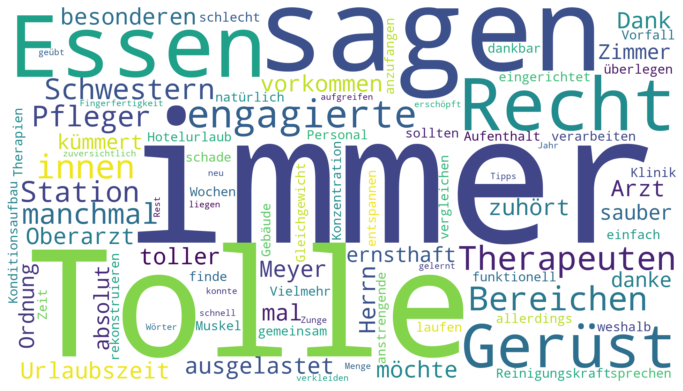

In [152]:
wordcloud = WordCloud(stopwords=german_stop_words, background_color="white",width=1920, height=1080, max_words=200).generate(berichte[0]) #width=1920, , height=1080 reviewlist[0]
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.savefig("img/drhoffman1.png") #, dpi=300
plt.rcParams['figure.figsize'] = [12, 8]
plt.savefig('wcbilder/' + a + '.png', dpi=300)




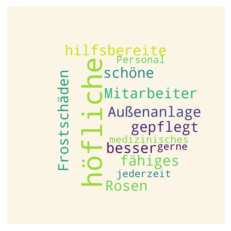

In [41]:
for p in range(len(df["NameKlinik"].unique())):
    x, y = np.ogrid[:1000, :1000]
    mask = (x - 500) ** 2 + (y - 500) ** 2 > 400 ** 2
    mask = 255 * mask.astype(int)
    wordcloud = WordCloud(stopwords=german_stop_words,background_color="#fbf5e5",width=1920, height=1080, mask=mask).generate(berichte[0])
    plt.imshow(wordcloud, extent=(8, 70, 8, 70), interpolation="bilinear")
    plt.axis("off")
    plt.savefig('plot.png', dpi=300)
    #plt.savefig("drhoffmann.png", format="png")
    #plt.savefig("imgkreis/k_w_"+dfsentiment["Name der Klinik"][p]+".png", dpi=300)
    #plt.savefig("wc_klinik1.1/k_w_"+listeneu[p]+".png", dpi=300)
    #plt.show()

## GM TextBlob

In [42]:
dfgm.head()

,Name der Klinik,Bewertung,Sternebewertung,Zufriedenheit
0,Herzogin Elisabeth Hospital,Vor der Corona Pandemie hätte ich jeden zugest...,2,Negativ
1,Herzogin Elisabeth Hospital,"Tolles Krankenhaus, trotzdem bin ich lieber g...",4,Positiv
2,Herzogin Elisabeth Hospital,"Lungenembolie! Ein Tag ITS, phantastische Fürs...",5,Positiv
3,Herzogin Elisabeth Hospital,Vor wenigen Tagen wurde bei mir ein Ganglion a...,5,Positiv
4,Herzogin Elisabeth Hospital,Alles sehr gut. Volle Punktzahl!,5,Positiv


In [43]:
reviews = [str(a) for a in dfgm['Bewertung']]
resultPolarity = []

In [46]:
for review in reviews:
    bewertungen = TextBlobDE(review)
    resultPolarity.append(bewertungen.polarity)

In [47]:
len(resultPolarity)

1932

In [48]:
dfgm['Polarity Level'] = resultPolarity

In [49]:
dfgm['Polarity Stimmung'] = np.where(dfgm['Polarity Level'] > 0, 'Positiv', 'Negativ')

In [50]:
dfgm.round(2).head(10)

,Name der Klinik,Bewertung,Sternebewertung,Zufriedenheit,Polarity Level,Polarity Stimmung
0,Herzogin Elisabeth Hospital,Vor der Corona Pandemie hätte ich jeden zugest...,2,Negativ,0.28,Positiv
1,Herzogin Elisabeth Hospital,"Tolles Krankenhaus, trotzdem bin ich lieber g...",4,Positiv,0.50,Positiv
2,Herzogin Elisabeth Hospital,"Lungenembolie! Ein Tag ITS, phantastische Fürs...",5,Positiv,0.33,Positiv
3,Herzogin Elisabeth Hospital,Vor wenigen Tagen wurde bei mir ein Ganglion a...,5,Positiv,0.41,Positiv
4,Herzogin Elisabeth Hospital,Alles sehr gut. Volle Punktzahl!,5,Positiv,0.50,Positiv
5,Herzogin Elisabeth Hospital,Ich werde nie wieder in ein anderes Krankenhau...,5,Positiv,0.21,Positiv
6,Herzogin Elisabeth Hospital,Ich bin begeistert von der Leistung des Assist...,5,Positiv,1.00,Positiv
7,Herzogin Elisabeth Hospital,"Eine 100%tige Empfehlung. Tolles Personal, all...",5,Positiv,0.50,Positiv
8,Herzogin Elisabeth Hospital,Am 20.02.2021 mit akutem Herzinfarkt puppenlus...,4,Positiv,0.41,Positiv
9,Herzogin Elisabeth Hospital,Vor 6 Wochen Hüft Tep links bekommen. Fühlte m...,5,Positiv,0.25,Positiv


In [52]:
final_df = dfgm.groupby(['Name der Klinik'])['Polarity Level'].mean()

In [53]:
final_df.sort_values(ascending=False)

Name der Klinik
Eilenriede Klinik Hannover                 0.566937
St. Martini Krankenhaus                    0.452998
Herzogin Elisabeth Hospital                0.440618
Klinik am Zuckerberg                       0.431934
Kreiskrankenhaus Osterholz                 0.410378
Sophienklinik                              0.373005
Klinik Fallingbostel                       0.369163
MediClin Klinikum Soltau                   0.332651
Diana Kliniken                             0.331340
Klinikum Peine                             0.329437
Elbe Klinikum Buxtehude                    0.319409
Krankenhaus Walsrode                       0.258705
DIAKOVERE Henriettenstift                  0.254691
AMEOS Klinikum Seepark Geestland           0.244272
Krankenhaus Winsen                         0.236789
HELIOS Klinik Cuxhaven                     0.208906
Agaplesion - Diakonieklinikum Rotenburg    0.206632
KRH Klinikum Agness Karll Laatzen          0.162503
Krankenhaus Buchholz                       0.160

In [54]:
dfgm.to_csv('GM_Clean.csv', index=False)

## Plot

In [ ]:
sns.jointplot(x='Zufriedenheit',y='Polarity Stimmung',data=df)

In [ ]:
plt.figure(figsize=(5,4),dpi=100)
sns.countplot(x="Gesamt",data=df)

In [ ]:
df.pivot_table(index=['NameKlinik'],columns='Zufriedenheit',aggfunc='size').plot(kind='bar')

In [ ]:
plt.figure(figsize=(10,20))
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.countplot(y='NameKlinik',data=df,hue='Gesamt', palette='Set1')

In [ ]:
df1 = df[df['NameKlinik'] == 'HEH Herzogin Elisabeth Hospital']
df2 = df[df['NameKlinik'] == 'Klinikum Wolfsburg']

In [ ]:
#fig, ax =plt.subplots(1,2)
plt.figure(figsize=(5,4),dpi=100)
sns.countplot(x='NameKlinik',data=df1,hue='Gesamt', palette='Set1')
#sns.countplot(ax=ax[1],x='NameKlinik',data=df2,hue='Gesamt', palette='Set1')

In [ ]:
# pip install pivottablejs

In [ ]:
# from pivottablejs import pivot_ui
# pivot_ui(df)

In [ ]:
### Checking for the Distribution of Default ###
verteilung= df.groupby('NameKlinik').Zufriedenheit.value_counts(normalize=True)*100
verteilung_df = verteilung.to_frame()
print(round(verteilung_df,2))

In [ ]:
verteilung_df.plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [ ]:
verteilung_df.head()

In [ ]:
sns.set(style="dark",palette="muted",font_scale=2) #for backgraound and font
sns.distplot(df["Gesamt"],bins=20,kde=False,color="y")
plt.tight_layout()

## Pie Chart

In [ ]:
deneme = df[df['NameKlinik'] == 'AMEOS Klinikum Hildesheim'].groupby(['NameKlinik'])['Gesamt']
yenidf = deneme.value_counts().sort_values(ascending=False).to_frame()

In [ ]:
deneme

In [ ]:
yenidf

In [ ]:
data = yenidf.Gesamt.to_list()

In [ ]:
plt.pie(data ,labels=['unzufrieden','Sehr zufrieden','zufrieden','wenig'],explode = (0, 0, 0.3, 0), autopct='%1.3f%%',shadow=True, startangle=90)